In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mini Project/FinalData/Fault_Present_Data.xlsx')

In [ ]:
data.shape

(123600, 5)

In [ ]:
X = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,4]

In [ ]:
y.unique()

array([0, 1, 2, 3, 4])

In [ ]:
X.shape

(123600, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Fc','Tc','Tr','Tj']] = sc.fit_transform(X_train[['Fc','Tc','Tr','Tj']])
X_test[['Fc','Tc','Tr','Tj']] = sc.transform(X_test[['Fc','Tc','Tr','Tj']])

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=0.5,gamma=100,decision_function_shape="ovo")
clf.fit(X_train,y_train)

SVC(C=0.5, decision_function_shape='ovo', gamma=100)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)*100

98.90291262135922

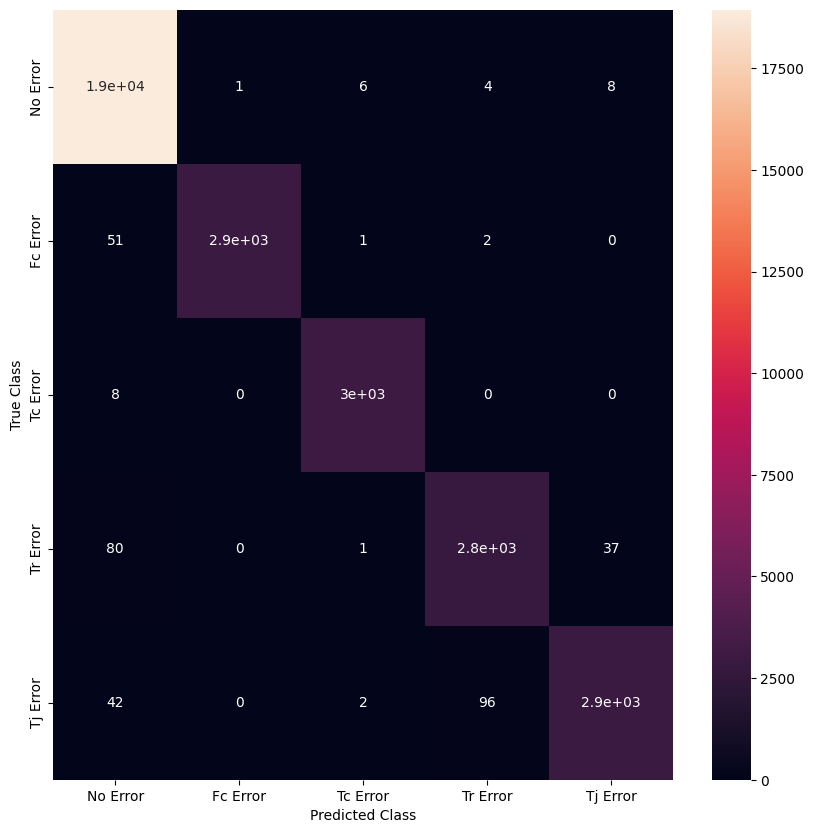

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,
            xticklabels=['No Error','Fc Error','Tc Error','Tr Error','Tj Error'],
            yticklabels=['No Error','Fc Error','Tc Error','Tr Error','Tj Error'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()